# PA 2: Classification - Decision Tree



1) Load Heart dataset from cardio_train.csv

### Features:

* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |



# Naive Bayes 

## Report (20 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier. Dont copy paste it from the internet. Write it on your own.  [4 points]


2) Describe the datasets [3 points]  like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [2 points]


4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy [3 points]

6) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!


## Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn.

In [55]:
#Array processing
import numpy as np
#Data analysis, exploratory operations by pandas
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

#For visualization. Matplotlib for basic visualization and seaborn for more appropriate figures
import matplotlib.pyplot as plt
import seaborn as sns

#For some of the date operations
import datetime

In [56]:
# Loading the dataset
df_data = pd.read_csv('cardio_train.csv', sep = ";", encoding='latin1')

In [57]:
# To print the first five records from the dataframe

df_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [58]:
# To print the last five records from the dataframe

df_data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [59]:
#Printing the class labels
for col in df_data.columns: 
    print(col)

id
age
gender
height
weight
ap_hi
ap_lo
cholesterol
gluc
smoke
alco
active
cardio


In [60]:
#Attribute id doesn't have any significance in predicting a cardiovascular disease hence removing it
df_data = df_data.drop('id', axis=1,)

In [61]:
#Check which features have NaN cells
nan_list = list(df_data.columns.values)
for nan in nan_list:
    print (nan,": ",sum(pd.isnull(df_data[nan])))

age :  0
gender :  0
height :  0
weight :  0
ap_hi :  0
ap_lo :  0
cholesterol :  0
gluc :  0
smoke :  0
alco :  0
active :  0
cardio :  0


In [62]:
x = df_data.drop('cardio', axis=1) #drop the target varible from the other variables
y = df_data['cardio'] #include only target variable

#https://stackabuse.com/decision-trees-in-python-with-scikit-learn/
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((49000, 11), (21000, 11), (49000,), (21000,))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64     10521
           1       0.64      0.64      0.64     10479

    accuracy                           0.64     21000
   macro avg       0.64      0.64      0.64     21000
weighted avg       0.64      0.64      0.64     21000

Accuracy: 0.64


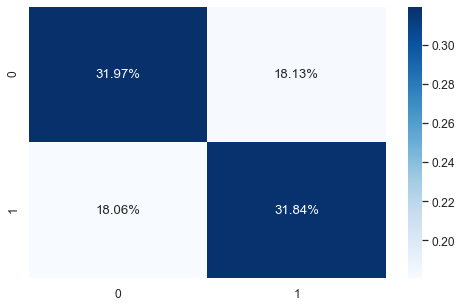

In [63]:
from sklearn.tree import DecisionTreeClassifier
accuracy_data = []
#using entropy as the criteria to build the decision tree 
classifier_entropy = DecisionTreeClassifier(criterion="entropy")
classifier_entropy.fit(x_train, y_train)

y_pred = classifier_entropy.predict(x_test)



confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')      #https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
print(classification_report(y_test, y_pred))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
accuracy_data.append(accuracy_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(


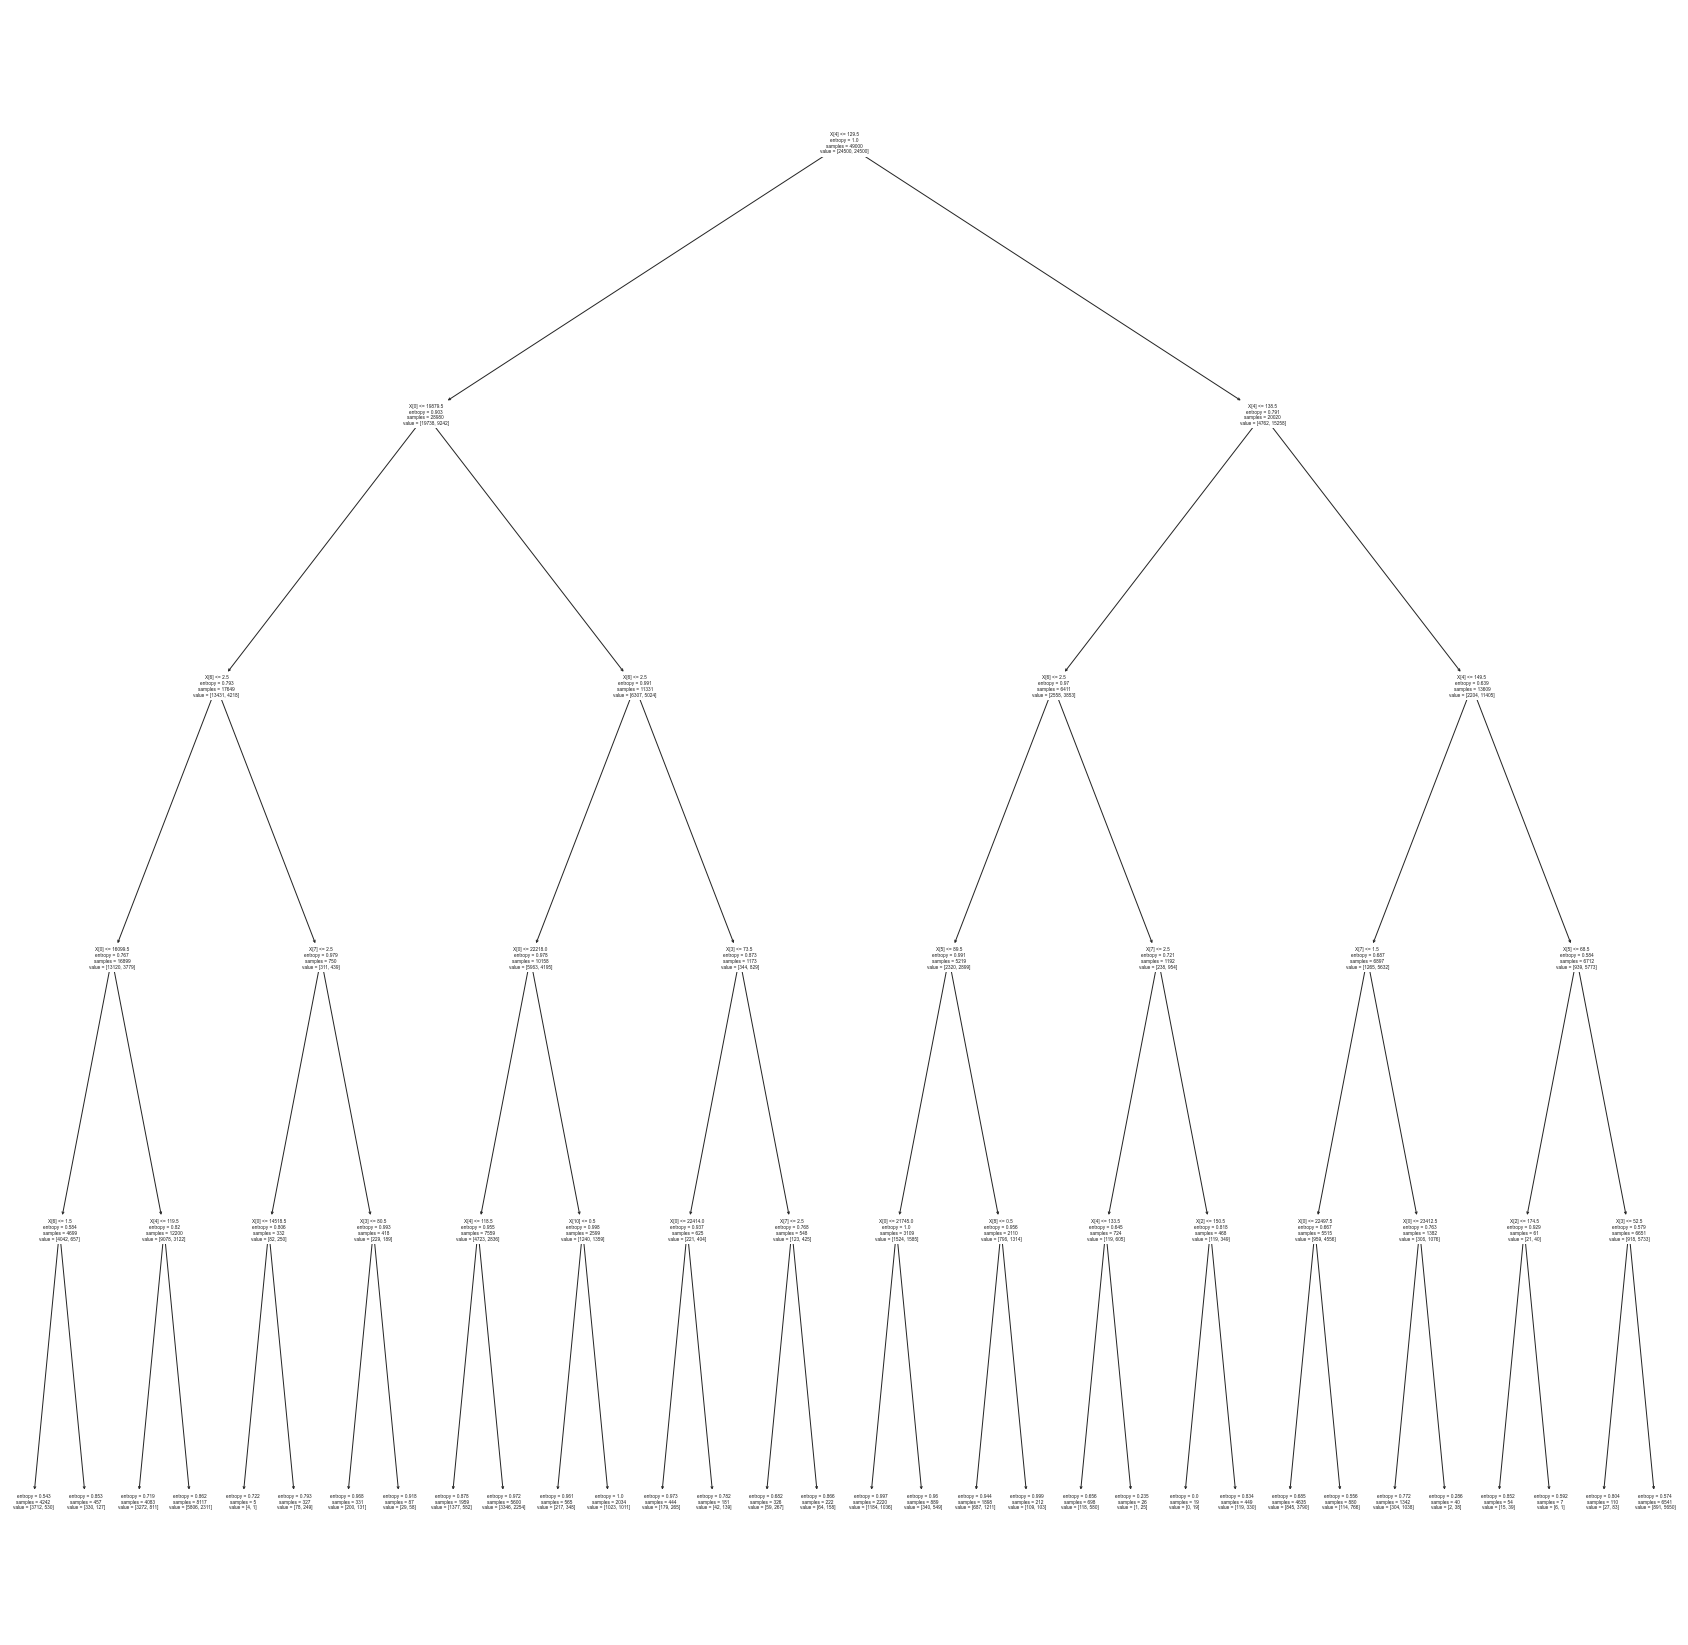

In [64]:
from sklearn import tree
from sklearn.tree import _tree  
# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(random_state=100, max_depth=5, min_impurity_split =0.3, criterion="entropy")
# Step 3: Train the model on the data
clf.fit(x_train, y_train)
# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
# clf.predict(X_test)

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
plt.figure(figsize=(30,30))
tree.plot_tree(clf);

              precision    recall  f1-score   support

           0       0.63      0.63      0.63     10521
           1       0.63      0.64      0.63     10479

    accuracy                           0.63     21000
   macro avg       0.63      0.63      0.63     21000
weighted avg       0.63      0.63      0.63     21000

Accuracy: 0.63


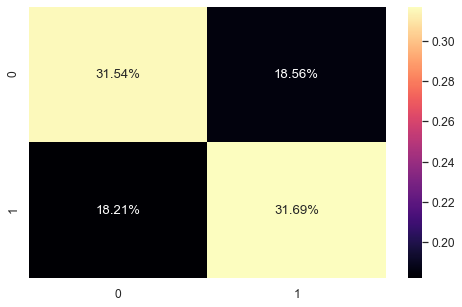

In [65]:
classifier = DecisionTreeClassifier(criterion="gini")
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='magma')    #https://matplotlib.org/stable/gallery/color/colormap_reference.html
print(classification_report(y_test, y_pred))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
accuracy_data.append(accuracy_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(


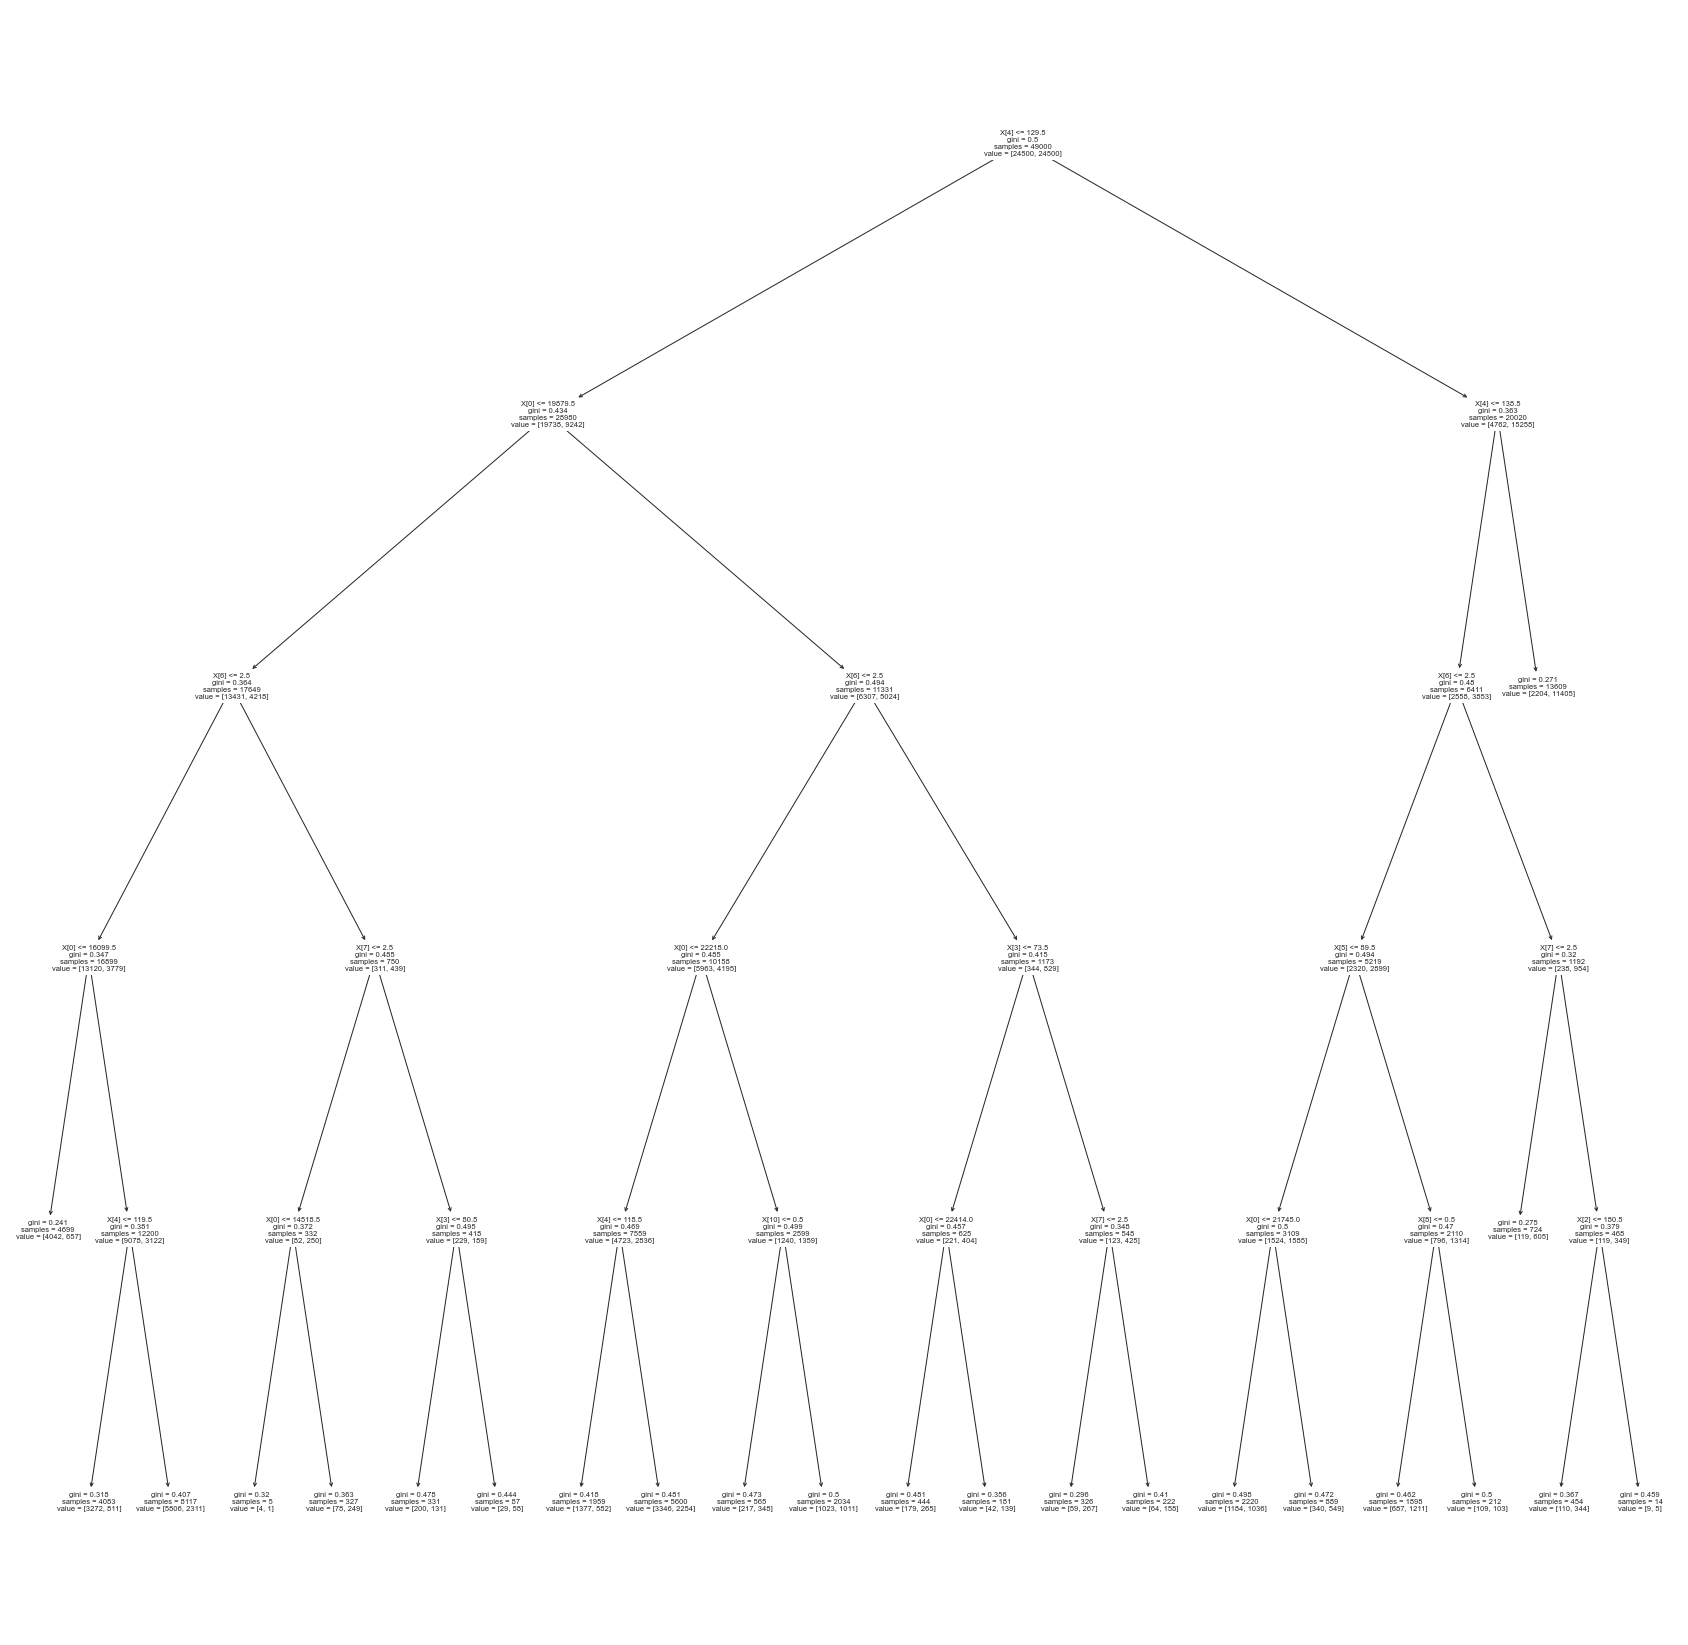

In [66]:
from sklearn import tree
from sklearn.tree import _tree  
# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(random_state=100, max_depth=5, min_impurity_split =0.3)
# Step 3: Train the model on the data
clf.fit(x_train, y_train)
# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
# clf.predict(X_test)

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
plt.figure(figsize=(30,30))
tree.plot_tree(clf);

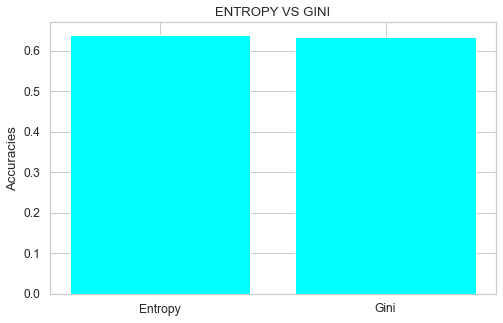

In [67]:
plt.bar(['Entropy','Gini'], accuracy_data, align='center', color = ['cyan']) #https://www.python-graph-gallery.com/3-control-color-of-barplots
plt.xticks(['Entropy','Gini'])
plt.ylabel('Accuracies')
plt.title('ENTROPY VS GINI')
plt.show()

In [68]:
y_test

3611     1
26395    1
56830    0
191      0
23866    1
        ..
31039    0
37319    0
19929    1
62982    0
16434    1
Name: cardio, Length: 21000, dtype: int64

## Naive Bayes

In [69]:
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, exploratory operations by pandas
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


#For visualization. Matplotlib for basic visualization and seaborn for more appropriate figures
import matplotlib.pyplot as plt
import seaborn as sns

#For some of the date operations
import datetime

In [70]:
# load the cardio data set which is given as cardio_train.csv
df = pd.read_csv('cardio_train.csv',sep=';')

In [71]:
# To print the first five records from the dataframe
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [72]:
# To print the last five records from the dataframe
df.tail(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [73]:
# To print the class labels
for col in df.columns: 
    print(col)

id
age
gender
height
weight
ap_hi
ap_lo
cholesterol
gluc
smoke
alco
active
cardio


In [74]:
#Attribute id doesn't have any significance in predicting a cardiovascular disease hence removing it
df = df.drop('id', axis=1,)

In [75]:
#Spliting the  dataset 70% for training, and 30% for testing the classifier
x = df.drop('cardio',axis=1)
y = df['cardio']
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42 )  #https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((49000, 11), (21000, 11), (49000,), (21000,))

In [76]:
x_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
46730,21770,1,156,64.0,140,80,2,1,0,0,1
48393,21876,1,170,85.0,160,90,1,1,0,0,1
41416,23270,1,151,90.0,130,80,1,1,0,0,1
34506,19741,1,159,97.0,120,80,1,1,0,0,1
43725,18395,1,164,68.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1216,22392,1,161,68.0,150,100,2,1,0,0,1
19036,14462,1,168,66.0,130,80,1,1,0,0,1
51256,14805,1,159,81.0,130,100,1,1,0,0,0
48198,20519,1,143,65.0,130,90,1,1,0,0,1


In [77]:
# Training the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(x_train,y_train)    #https://heartbeat.fritz.ai/naive-bayes-classifier-in-python-using-scikit-learn-13c4deb83bcf

GaussianNB()

In [78]:
# Running the model on the test data
y_pred = model.predict(x_test)

In [79]:
# Output generated by the model
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
# Accuracy of the model
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

59.48571428571429

<AxesSubplot:>

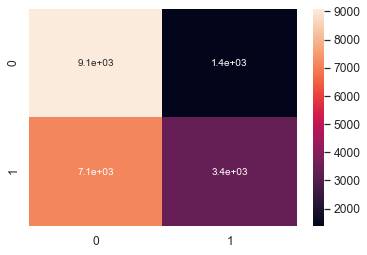

In [81]:
# To create confusion matrix
predicted = model.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
sns.heatmap(confusion_matrix, annot=True)     #https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

In [82]:
# Print the Classification report which includes precision, recall, f1-score, support
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.56      0.87      0.68     10461
           1       0.71      0.32      0.44     10539

    accuracy                           0.59     21000
   macro avg       0.64      0.60      0.56     21000
weighted avg       0.64      0.59      0.56     21000



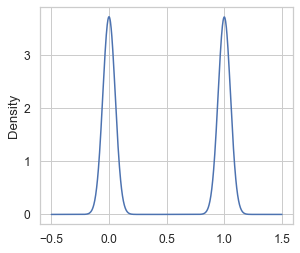

In [83]:
#Visualization of the target variable
df['cardio'].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

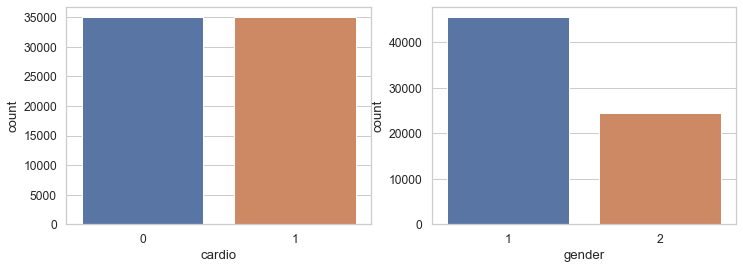

In [86]:
#visualization of target variable 
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x="cardio", data=df, ax=axes[0])
sns.countplot(x="gender", data=df, ax=axes[1]);